In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -------------------------------------- - 2.9/3.0 MB 23.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 22.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=f35796acba95daaa162663ca562b0c4b8b8272a7023f10bac72a64a03e1437ee
  Stored in directory: c:\users\aryan kumar\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Extracting Tesla Stock Data Using yfinance

In [5]:
# Extract Tesla data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Extracting Tesla Revenue Data Using Webscraping

In [6]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue.tail()


,Date,Revenue


## Extracting GameStop Stock Data Using yfinance

In [8]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Extracting GameStop Revenue Data Using Webscraping

In [9]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue.tail()


,Date,Revenue


## Tesla Stock and Revenue Dashboard

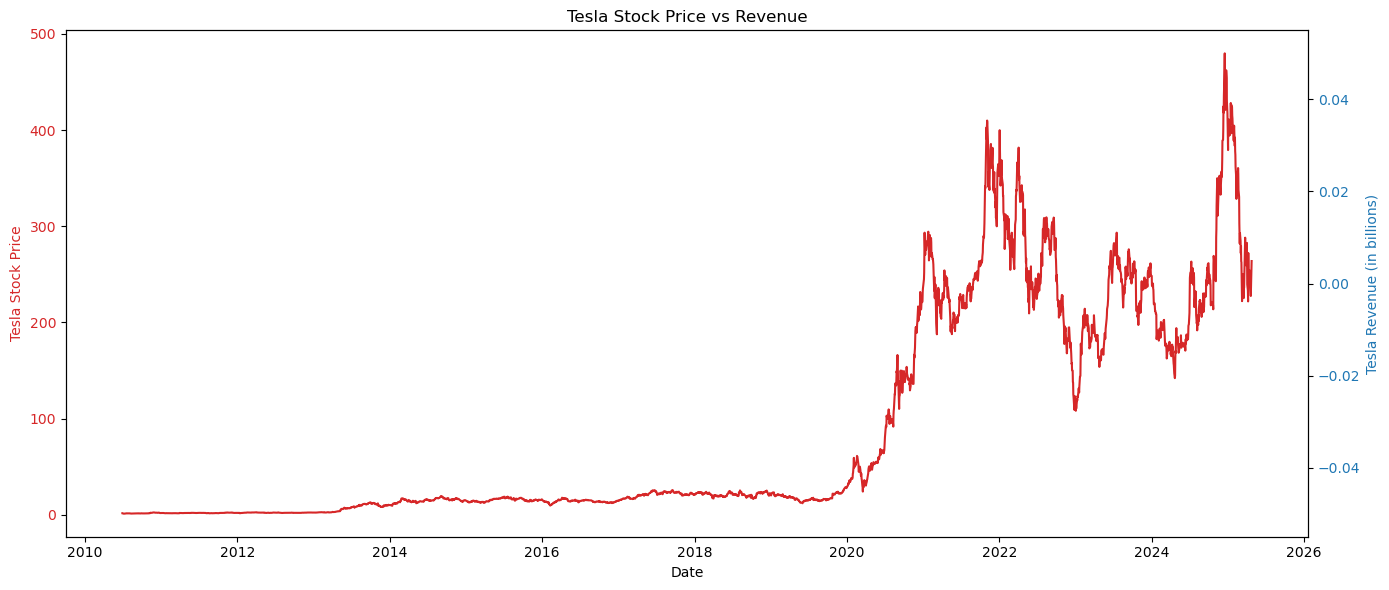

In [10]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.set_xlabel("Date")
    ax1.set_ylabel(f"{stock} Stock Price", color='tab:red')
    ax1.plot(stock_data["Date"], stock_data["Close"], color='tab:red', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel(f"{stock} Revenue (in billions)", color='tab:blue')
    ax2.plot(pd.to_datetime(revenue_data["Date"]), revenue_data["Revenue"] / 1e3, color='tab:blue', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.title(title)
    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla", "Tesla Stock Price vs Revenue")


## GameStop Stock and Revenue Dashboard

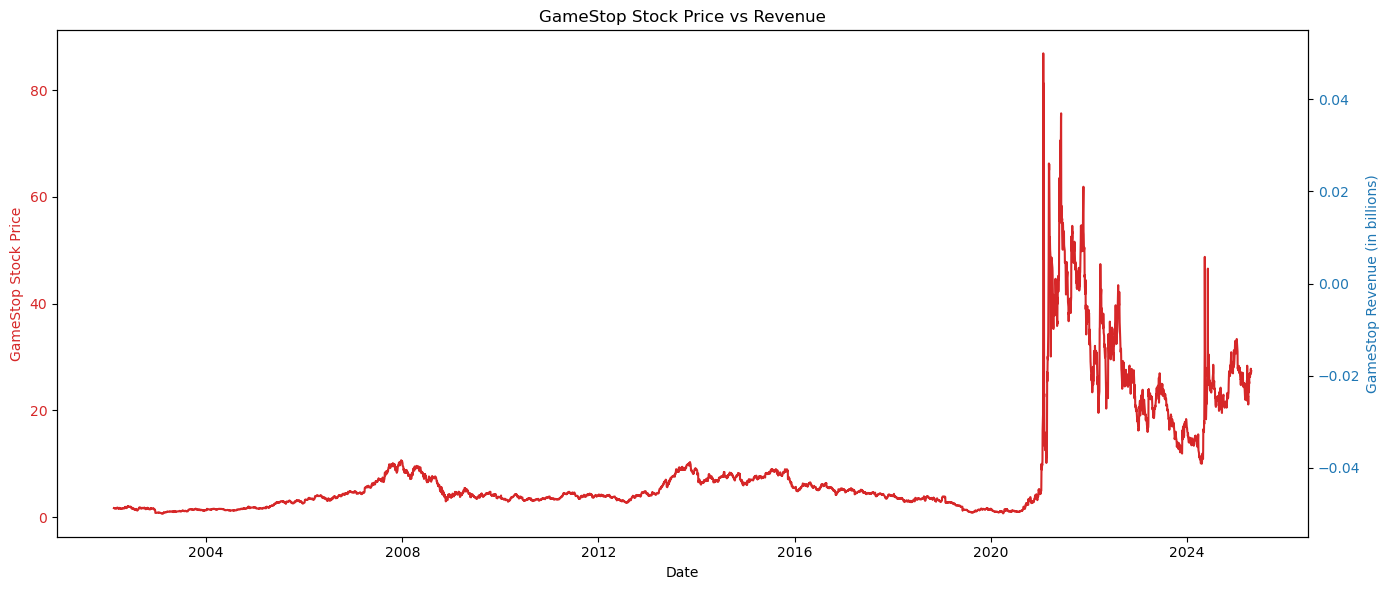

In [11]:
make_graph(gme_data, gme_revenue, "GameStop", "GameStop Stock Price vs Revenue")